Data Mining: Basic Concepts - WS'19/20 
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Dr. Johannes Fuchs, Eren Cakmak, Frederik Dennig
```
__Organize in teams of 2 people, return the exercise by Tue, Nov 12th, 2019 (10:00 AM) using ILIAS (only one Jupyter Notebook .ipyb file)__

---

Assignment 02 in R - _(20 Points)_
---------------
- ___Please put your names and student IDs here___:
    - _Name_, _Student ID_
    - _Name_, _Student ID_

---

#### Exercise 1: Data Types - _(3 Points)_
Imagine you have the following dataset:

| Name 	| Gender   	| Economic status  	| Education        	|Annual income 	|
|------	|----------	|------------------	|------------------	|--------------	|
|Bob   	|Male      	| Low              	|  High School     	| 34 000       	|
|Alice 	|Female    	| Medium           	|  Master          	| 42 000       	|
|Lisa  	|Female    	| High             	|  Bachelor        	| 58 000       	|

##### __(a) Describe for each column whether it contains nominal, ordinal or numerical data and explain why you made that decision__

```
Name -> Nominal,
Gender -> Nominal,
Economic status -> ordinal,
Education -> ordinal,
Annual income -> numeric
```

##### __(b) Give at least one mathematical operation that can be used on all three data types__

= (equals)

---

#### Exercise 2: Missing Values - _(8 Points)_ 

##### __(a) Import the dataset ``data_exercise2.csv`` and print the data.__ _(Hint: notice the missing values)_

In [465]:
data <- read.csv('data_exercise2.csv')
print(data)

     x     y
1  0.0 3.201
2  0.2 4.568
3  0.4 5.704
4  0.6 6.456
5  0.8 6.872
6  1.0 7.000
7  1.2 6.888
8  1.4 6.584
9  1.6 6.136
10 1.8 5.892
11 2.0 5.000
12 2.2 4.308
13 2.4    NA
14 2.6    NA
15 2.8 3.112
16 3.0 3.000
17 3.2 3.128
18 3.4 3.544
19 3.6 4.296
20 3.8 5.332
21 4.0 7.100


##### __(b) Fill in the missing values using the attribute mean. Plot the result using the ``plot`` function.__

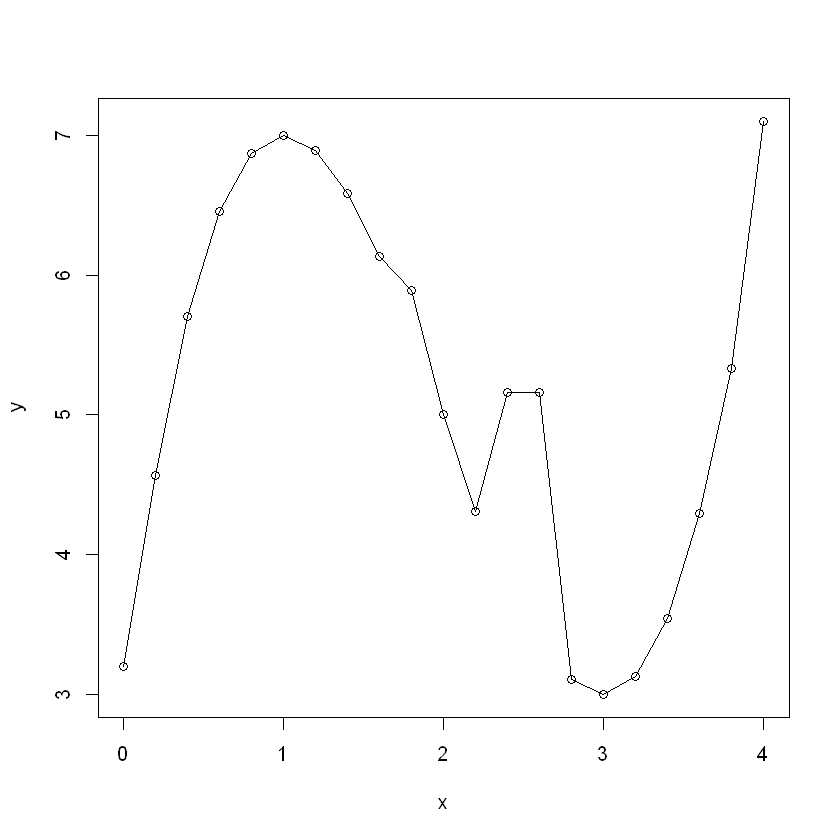

In [466]:
fillMean <- data
temp <- data$y
mean(temp[!is.na(temp)]) -> m
fillMean[is.na(fillMean)] <- m

plot(fillMean)
lines(fillMean)

##### __(c) Instead of filling the missing values with the mean, we will now try to fill them using regression.__
##### __What polynomial degree does the function you are looking for most likely have?__ _(Hint: Use the ``lm``, ``poly`` and `predict.lm` functions to create the regession model and use the ``lines`` function to plot it)_

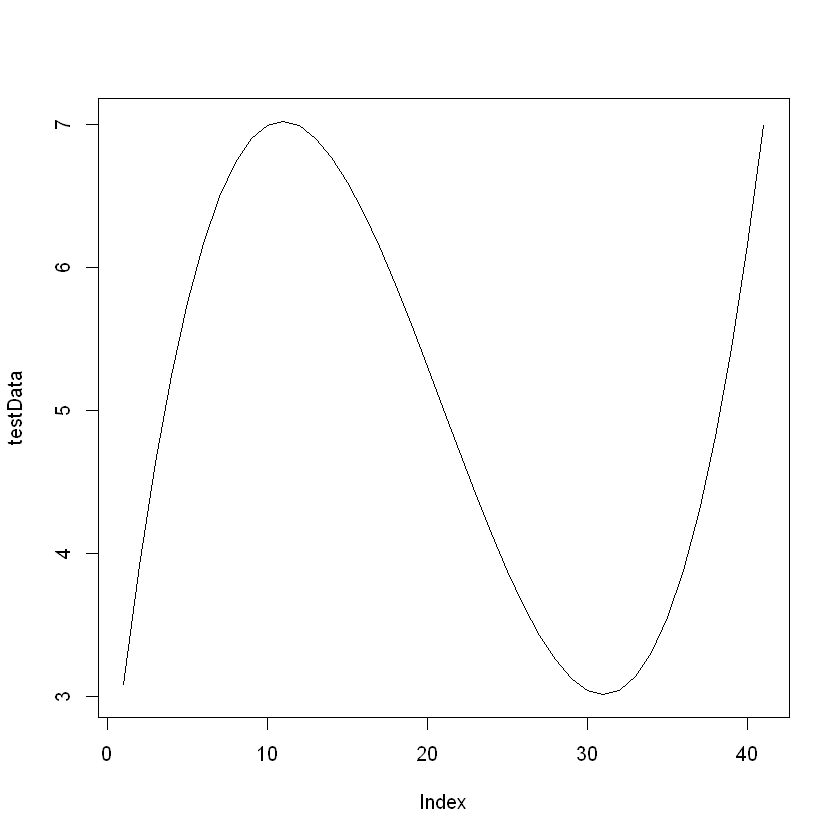

In [467]:
empty <- subset(data, is.na(y), select=c(x))

model <- lm(y ~ poly(x,3, raw = TRUE), data = data)

testData <- data.frame(matrix(seq(0, 4, by=0.1),nrow=41,  ncol=2))
names(testData) <- c('x','y')

testData <- predict(model, testData)

plot(testData, type='l')

##### __(d) Compute the coefficients for the function that describes the data.__

In [468]:
coef <- model$coefficients
print(paste(coef[4], 'x³ + ',coef[3], 'x² + ',coef[2], 'x +',coef[1],collapse=''))

[1] "0.994981123090289 x³ +  -5.96214828608983 x² +  8.90732912257821 x + 3.08270611603447"


##### __(e) Use the computed polynomial coefficients to implement a regression method. Use the method to fill the missing values in the dataframe with values.__

In [469]:
fillRegression <- data

reg <- function(xVals, coef){
    for(idx in 1:nrow(xVals)){
        x <- xVals[[idx, 1]]
        xVals[[idx, 1]] <- coef[4]*x**3 + coef[3]*x**2 + coef[2]*x + coef[1]
    }
    return(xVals)
}

empty <- subset(fillRegression, is.na(y), select=c(x))

empty <- reg(empty, coef)

fillRegression[is.na(fillRegression)] <- empty[,1]

##### __(f) Plot your both result (mean and polynomial regression) and compare the results. Explain which values you think fit the data better and why.__

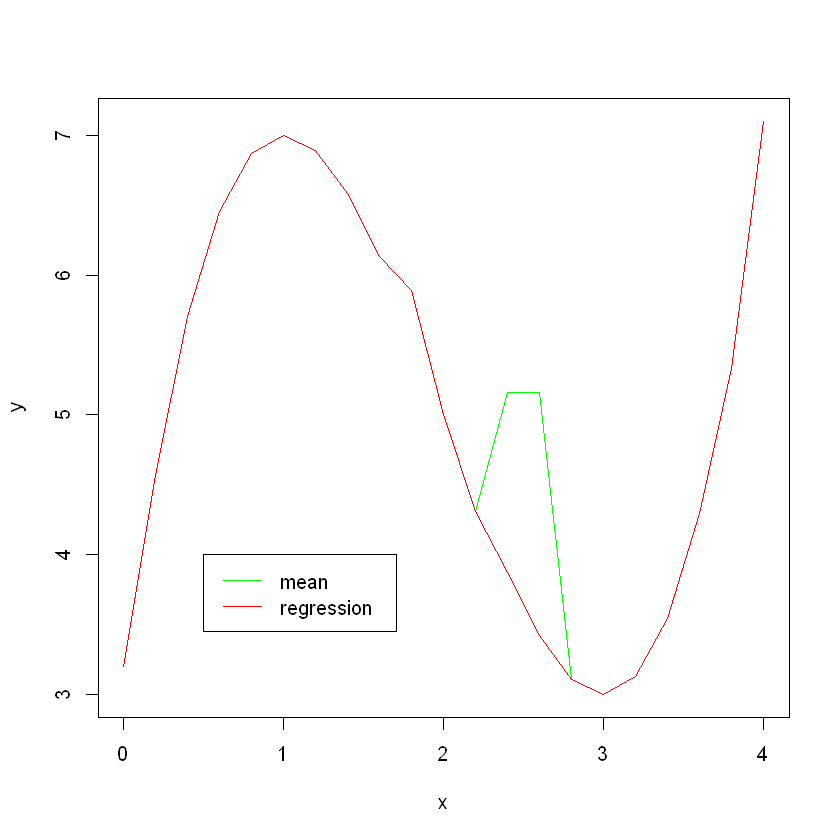

In [472]:
plot(fillMean,type="l",col="green") 
lines(fillRegression,col="red")

legend(0.5, 4, legend=c("mean", "regression"), col=c("green", "red"), lty=c(1, 1))

Reconstruction using mean values has produces an obvious, unnatural bump. Regression is the better choise. 

---

#### Exercise 3: Binning - _(3 Points)_ 
The following data consists of the age of several people: 
```
> [13, 15, 16, 17, 19, 20, 21, 21, 22, 22, 25, 25, 26, 26, 30, 33, 33, 35, 35, 35, 35, 36, 40, 42, 46, 53, 70]
```

##### __(a) Apply binning to the dataset using 3 equal-width bins. Smooth the data using the mean of the bins. Explain the steps of your approach and give the final result.__
##### __Please solve this exercise by hand without using R.__ 

```
min value = 13
max value = 70
width = (70 - 13) / 3 = 19

bin1: 13 - 32 = [13, 15, 16, 17, 19, 20, 21, 21, 22, 22, 25, 25, 26, 26, 30]
bin2: 32 - 51 = [33, 33, 35, 35, 35, 35, 36, 40, 42, 46]
bin3: 51 - 90 = [53, 70]
```

##### __(b) Apply binning to the dataset using 3 equal-depth bins. Smooth the data using the mean of the bins. Explain the steps of your approach and give the final result.__
##### __Please solve this exercise by hand without using R.__ 

```
number of values = 27
bin depth = 27 / 3 = 9

bin1 = [13, 15, 16, 17, 19, 20, 21, 21, 22]
bin2 = [22, 25, 25, 26, 26, 30, 33, 33, 35]
bin3 = [35, 35, 35, 36, 40, 42, 46, 53, 70]
```


##### __(c) Compare the results from a) and b). Give one reason why equal-depth binning might be preferable in this scenario.__

Because of the outliers, the equal-width bins are spread out over a large range. The equal depth binning method creates a better grouping. 

---

#### Exercise 4: Normalization - _(6 Points)_ 

##### __(a) Which of the columns in the following table can be normalized using the linear or logarithmic min-max normalization? Discuss if the normalization is useful or not.__

|id |Gender|Size (cm)|Weight (kg)|Hair Color|Blood Type|Glasses|
|---|------|---------|-----------|----------|----------|-------|
|22|Female|175|65|red|A|yes|
|23|Female|176|71|red|AB|yes|
|24|Female|176|71|red|O|yes|
|25|Female|179|69|black|B|yes|
|26|Female|195|62|black|B|no|
|27|Female|203|64|black|O|yes|
|28|Female|165|70|brown|AB|no|
|29|Female|172|62|brown|AB|no|
|30|Female|166|52|brown|AB|no|
|31|Female|182|67|brown|AB|no|
|32|Female|168|70|brown|O|yes|
|33|Female|168|59|blond|B|no|
|34|Male|168|62|black|B|no|
|35|Male|178|63|red|B|no|
|36|Male|178|59|red|AB|no|
|37|Male|172|67|brown|A|yes|
|38|Male|172|58|brown|A|no|
|39|Male|185|62|brown|A|no|
|40|Male|190|72|black|B|yes|
|41|Male|184|70|black|B|yes|

```
id: no normalisation
gender: no normalisation
size: linear normalisation
weight: linear normalisation
hair color: no normalisation
blood type: no normalisation
glasses: no normalisation
```

##### __(b) Using the column “Size”, use linear min-max normalization to transform the values ``166, 180, 191`` into the range ``[0, 1]``. Give the formula used to compute the values, including min/max value.__

```
min = 165, max = 203

Xnorm = (X - min) / (max - min) = (X - 165) / 38

[166, 180, 191] will be normalised to [0.03, 0.39, 0.68]
```

##### __(c) Using the column “Weight”, use logarithmic min-max normalization to transform the values ``58, 65, 69`` into the range ``[0, 1]``. Give the formula used to compute the values, in-cluding min/max value__

##### __(d) Write a method to normalize all columns of the following dataframe using the linear min-max normalization.__

In [471]:
norm <- function(data){
    maxV <- max(data)
    minV <- min(data)
    
    return ((data - minV) / (maxV - minV))
}


# use height and gender as sample data
height <- c(175,176,176,179,195,203,165,172,166,182,168,168,168,178,178,172,172,185,190,184)
gender <- c('male', 'female')
df <- data.frame(height, gender)

for(idx in 1:ncol(df)){
    row <- unlist(df[idx])
    if(typeof(row) == 'double'){
        df[[idx]] <- norm(row)
    }
}

print(df)


       height gender
1  0.26315789   male
2  0.28947368 female
3  0.28947368   male
4  0.36842105 female
5  0.78947368   male
6  1.00000000 female
7  0.00000000   male
8  0.18421053 female
9  0.02631579   male
10 0.44736842 female
11 0.07894737   male
12 0.07894737 female
13 0.07894737   male
14 0.34210526 female
15 0.34210526   male
16 0.18421053 female
17 0.18421053   male
18 0.52631579 female
19 0.65789474   male
20 0.50000000 female
